In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sigma = 10
gamma = 1/np.sqrt(1-.3**2)
theta = sigma/200

In [3]:
def H(u):
    return(-u+np.log(1.+u+u**2/2))
def G(g):
    return( 1-np.e**(H(g/theta) - H(1/theta)) )

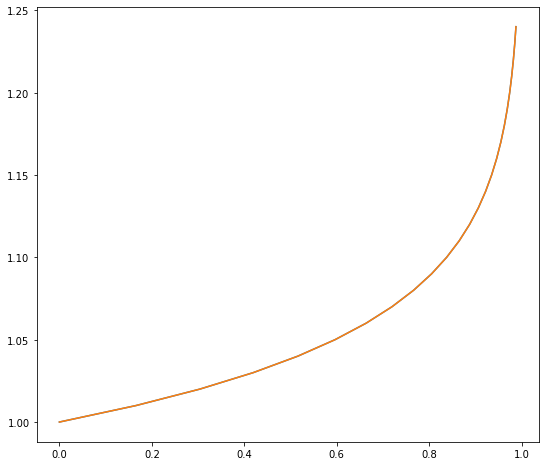

In [4]:
gammaMax = 1.25
x = np.arange(1,gammaMax, 1/100)
#G inverse in terms of H inverse
y = 1-np.e**(H(x/theta)-H(1/theta))
plt.plot(y,x)
#G inverse
y = G(x)
plt.plot(y,x)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(9,8)

In [5]:
maxGamma = 10
sRate = 1/100
gammaTable = np.arange(1,maxGamma,sRate)
u1Table = 1- np.e**(H(gammaTable/theta)-H(1/theta))
def GiInterpolation(u1):
    if(type(u1) == np.ndarray):
        v = np.zeros(u1.size)
        for j in range(0, u1.size):
            i=-2
            for u in u1Table:
                i+=1
                if(u>u1[j]):
                    break;
            m=(gammaTable[i+1]-gammaTable[i])/(u1Table[i+1]-u1Table[i])
            dx=(u1[j]-u1Table[i])
            v[j] = m*dx + gammaTable[i]
    else:
        i=-2
        for u in u1Table:
            i+=1
            if(u>u1):
                break;
            m=(gammaTable[i+1]-gammaTable[i])/(u1Table[i+1]-u1Table[i])
            dx=(u1-u1Table[i])
            v = m*dx + gammaTable[i]
    return(v)

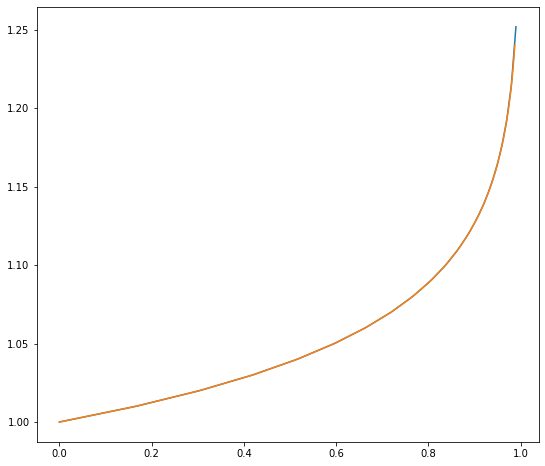

In [6]:
gammaMax = 1.25
x = np.arange(0,1,1/100)
y = GiInterpolation(x)
plt.plot(x,y)
x = np.arange(1,gammaMax, 1/100)
y = G(x)
plt.plot(y,x)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(9,8)

In [7]:
def Gi(u):
    if(type(u) == np.ndarray):
        v=np.zeros(u.size);
        for i in range(0, u.size):
            v[i] = np.log(1-u[i]) + H(1/theta)
            if(v[i]>-np.e**-26):
                v[i]=(-6*u[i])**(1/3);
            elif(v[i]<-np.e**12):
                v[i]=-u[i]+11.36*(-u[i])**0.06;
            else:
                v[i]=GiInterpolation(u[i])
        return(v)
    else:
        v = np.log(1-u) + H(1/theta)
        print(v)
        if(v>-np.e**-26):
            return((-6*v)**(1/3))
        elif(v<-np.e**12):
            return(-v+11.36*(-v)**0.06)
        else:
            return(GiInterpolation(u))

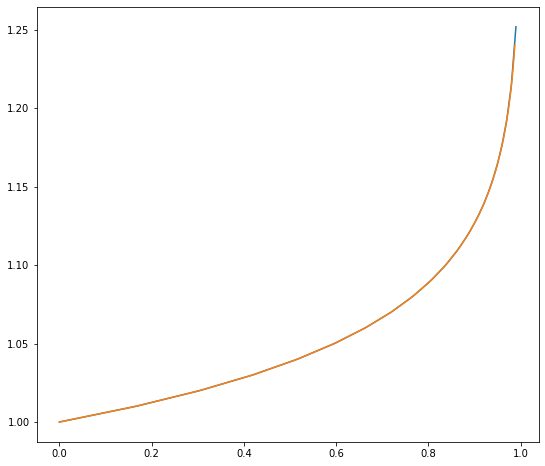

In [ ]:
gammaMax = 1.25
x = np.arange(0,1,1/100)
y = GiInterpolation(x)
plt.plot(x,y)
x = np.arange(1,1.25,1/100)
y = G(x)
plt.plot(y,x)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(9,8)

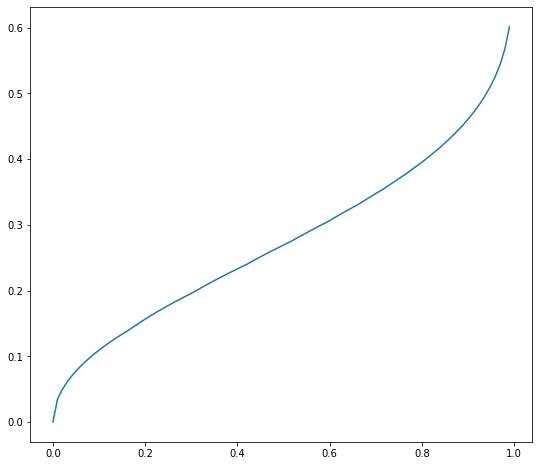

In [11]:
gammaMax = 1.25
x = np.arange(0,1,1/100)
y = GiInterpolation(x)
y = np.sqrt(1-y**-2)
plt.plot(x,y)
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(9,8)